### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import chardet
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
import pickle

### Detecting the encoding of the CSV file

In [2]:
def detect_encoding(file_path):
    with open(file_path, 'rb') as rawdata:
        result = chardet.detect(rawdata.read())
    return result['encoding']

detected_encoding = detect_encoding('spam.csv')

print("Detected Encoding:", detected_encoding)

Detected Encoding: Windows-1252


### Reading the dataset

In [3]:
spam_data = pd.read_csv('spam.csv', encoding='Windows-1252')

In [4]:
spam_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
spam_data.shape

(5572, 5)

### Dropping un-necessary columns

In [6]:
spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [7]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Checking for null values

In [8]:
spam_data.isnull().sum()

v1    0
v2    0
dtype: int64

### Getting information out of the dataset

In [9]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Assigning custom column names to both the columns

In [10]:
spam_data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [11]:
spam_data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Applying label encoder on the label column

In [12]:
encoder = LabelEncoder()

In [13]:
spam_data['target'] = encoder.fit_transform(spam_data['target'])

In [14]:
spam_data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Checking for duplicate values and dropping them

In [15]:
total_no_of_duplicate_values = spam_data.duplicated().sum()

In [16]:
total_no_of_duplicate_values

403

In [17]:
spam_data.drop_duplicates(keep='first', inplace=True)

In [18]:
total_no_of_duplicate_values = spam_data.duplicated().sum()

In [19]:
total_no_of_duplicate_values

0

### Plotting the total number of spam text and ham text on graph

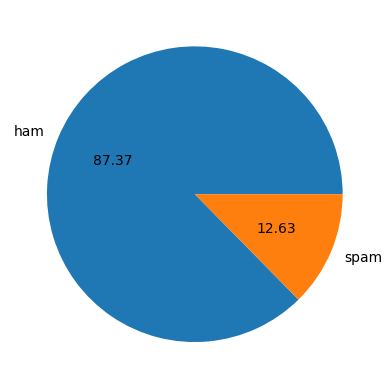

In [20]:
plt.pie(spam_data['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

#### from the above dataset we can understand that the dataset is imbalanced

### Checking for total number of alphabets, words and sentences in the sms texts

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Somenath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# getting the length/total number of characters of each sms text and putting it inside a new column
spam_data['totalNumberOfCharacters_eachSmsText'] = spam_data['text'].apply(len)

In [23]:
spam_data

,target,text,totalNumberOfCharacters_eachSmsText
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [24]:
# getting the total number of words of each sms text and putting it inside a new column
spam_data['numOfWords_eachSmsText'] = spam_data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
spam_data

,target,text,totalNumberOfCharacters_eachSmsText,numOfWords_eachSmsText
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [26]:
# getting the total number of sentences in each sms text and putting it inside a new column
spam_data['numOfSentence_eachSmsText'] = spam_data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
spam_data

,target,text,totalNumberOfCharacters_eachSmsText,numOfWords_eachSmsText,numOfSentence_eachSmsText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


### Plotting a histogram for both spam and ham classes w.r.t to total number of charaters, total number of words and total number of sentences

<Axes: xlabel='totalNumberOfCharacters_eachSmsText', ylabel='Count'>

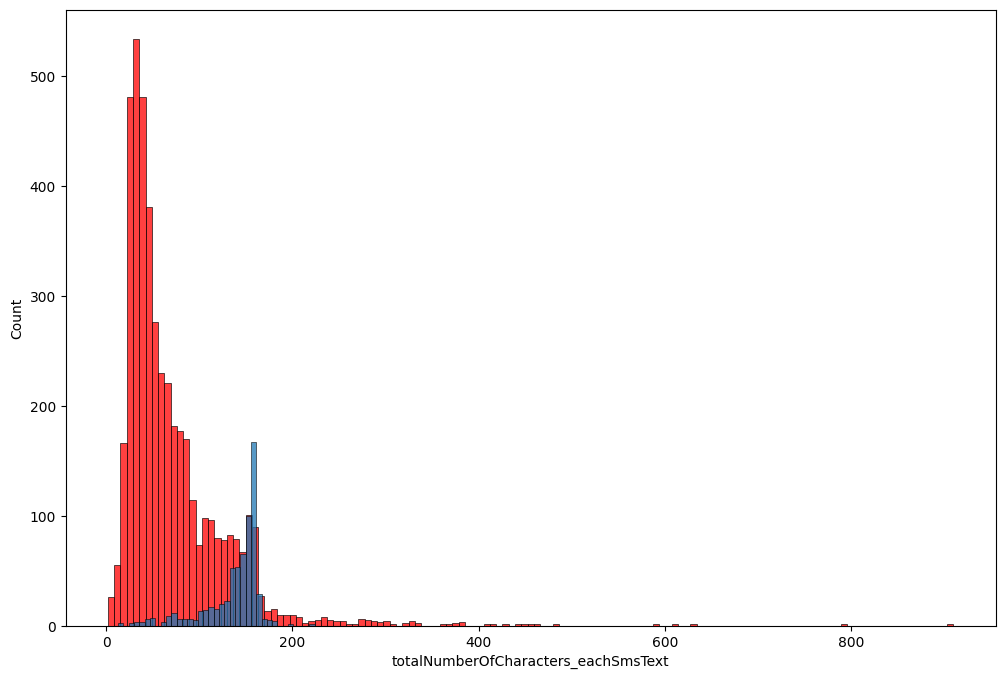

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(spam_data[spam_data['target'] == 0]['totalNumberOfCharacters_eachSmsText'], color='red')
sns.histplot(spam_data[spam_data['target'] == 1]['totalNumberOfCharacters_eachSmsText'])

#### from the above histogram plot, we can see that the total number of characters used in ham messages are very much less than the total number of characters used in spam messages

<Axes: xlabel='numOfWords_eachSmsText', ylabel='Count'>

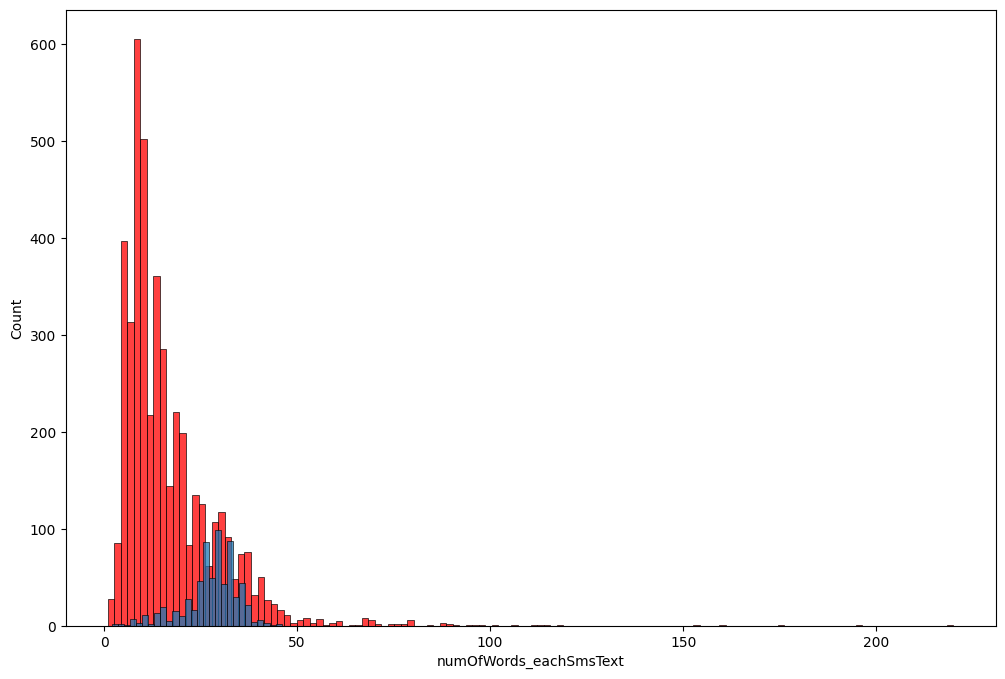

In [29]:
plt.figure(figsize=(12, 8))
sns.histplot(spam_data[spam_data['target'] == 0]['numOfWords_eachSmsText'], color='red')
sns.histplot(spam_data[spam_data['target'] == 1]['numOfWords_eachSmsText'])

#### from the above histogram plot, we can see that the total number of words used in ham messages are very much less than the total number of words used in spam messages

<Axes: xlabel='numOfSentence_eachSmsText', ylabel='Count'>

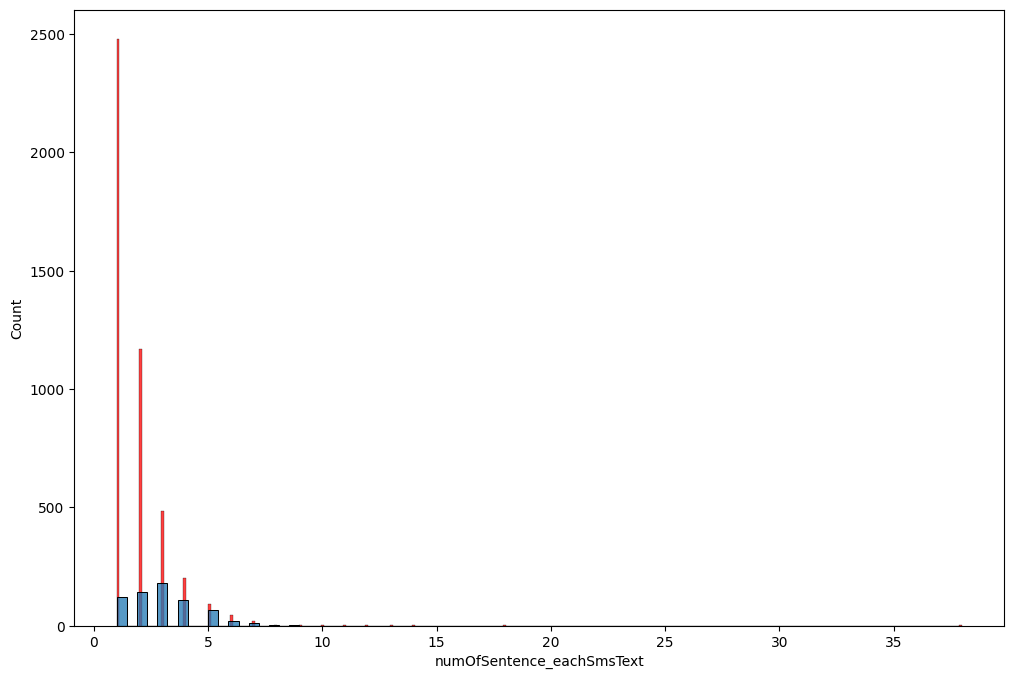

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(spam_data[spam_data['target'] == 0]['numOfSentence_eachSmsText'], color='red')
sns.histplot(spam_data[spam_data['target'] == 1]['numOfSentence_eachSmsText'])

#### from the above histogram plot, we can see that the total number of sentences used in ham messages are very much less than the total number of sentences used in spam messages

### Visualizing the correlation among the features

C:\Users\Somenath\AppData\Local\Temp\ipykernel_7144\1190189148.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_data.corr(), annot=True)


<Axes: >

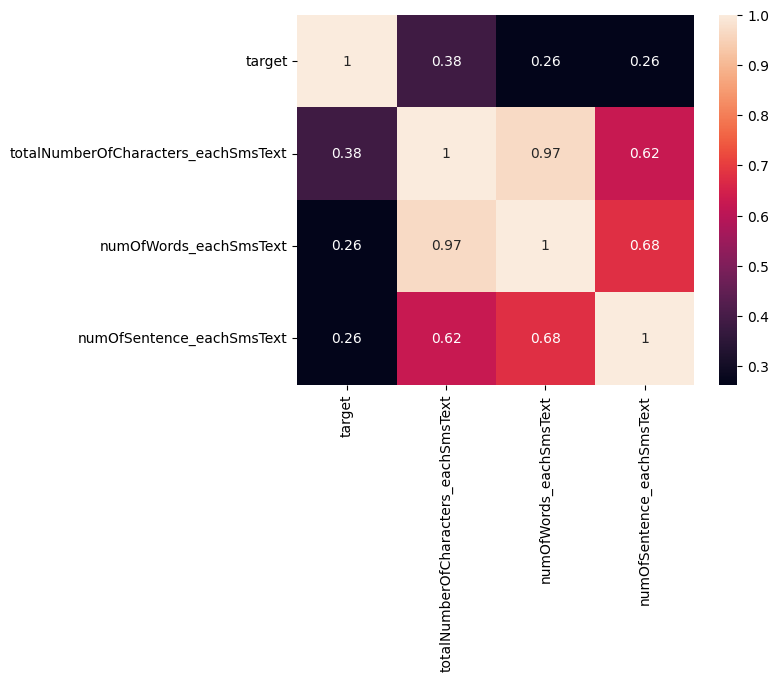

In [31]:
sns.heatmap(spam_data.corr(), annot=True)

### Data Pre-processing

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Somenath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
ps = PorterStemmer()

In [34]:
def preprocess_text(text):
  text = text.lower() # step 1: convert the text into lower case

  text = nltk.word_tokenize(text) # step 2: breaking the text down into tokens

  # step 3: removing special characters
  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  # step 4: removing punctuations and stopwords
  text = y[:] 

  y.clear() 

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # step 5: stemming
  text = y[:]

  y.clear()

  for i in text:
    y.append(ps.stem(i))

  # step 6: returning the final preprocess text by converting it from array to string
  return " ".join(y)

In [35]:
spam_data['proccessed_text'] = spam_data['text'].apply(preprocess_text) # applying pre_process text function on every data present under 'text' column

In [36]:
spam_data

,target,text,totalNumberOfCharacters_eachSmsText,numOfWords_eachSmsText,numOfSentence_eachSmsText,proccessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


### Displaying the most words used in spam and ham respectively

In [37]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

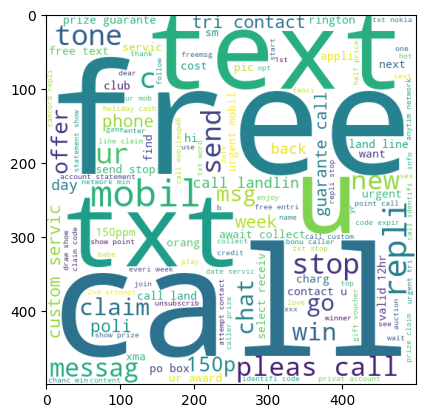

In [38]:
# displaying most words used in spam messages
spam_wordcloud = wc.generate(spam_data[spam_data['target'] == 1]['proccessed_text'].str.cat(sep=" "))

plt.imshow(spam_wordcloud)

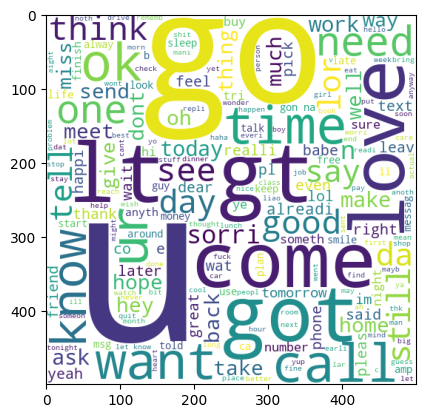

In [39]:
# displaying most words used in ham messages
spam_wordcloud = wc.generate(spam_data[spam_data['target'] == 0]['proccessed_text'].str.cat(sep=" "))

plt.imshow(spam_wordcloud)

### Vectorizing the textual data of 'proccessed_text' column

In [40]:
vectorizer = TfidfVectorizer(max_features=3000)

In [41]:
X = vectorizer.fit_transform(spam_data['proccessed_text']).toarray()
y = spam_data['target'].values 

In [42]:
type(X)

numpy.ndarray

In [43]:
type(y)

numpy.ndarray

### Performing train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Initializing the machine learning models

In [45]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### training the model one by one

In [46]:
gnb.fit(X_train, y_train)

X_train_pred_gnb = gnb.predict(X_train)
print(f"Accuracy score on training data: {accuracy_score(y_train, X_train_pred_gnb)}")
print(f"Precision score on training data: {precision_score(y_train, X_train_pred_gnb)}")

print('\n')

X_test_pred_gnb = gnb.predict(X_test)
print(f"Accuracy score on testing data: {accuracy_score(y_test, X_test_pred_gnb)}")
print(f"Precision score on testing data: {precision_score(y_test, X_test_pred_gnb)}")

Accuracy score on training data: 0.8931076178960097
Precision score on training data: 0.5381400208986415


Accuracy score on testing data: 0.8694390715667312
Precision score on testing data: 0.5068493150684932


In [47]:
mnb.fit(X_train, y_train)

X_train_pred_mnb = mnb.predict(X_train)
print(f"Accuracy score on training data: {accuracy_score(y_train, X_train_pred_mnb)}")
print(f"Precision score on training data: {precision_score(y_train, X_train_pred_mnb)}")

print('\n')

X_test_pred_mnb = mnb.predict(X_test)
print(f"Accuracy score on testing data: {accuracy_score(y_test, X_test_pred_mnb)}")
print(f"Precision score on testing data: {precision_score(y_test, X_test_pred_mnb)}")

Accuracy score on training data: 0.9789600967351875
Precision score on training data: 0.9953703703703703


Accuracy score on testing data: 0.9709864603481625
Precision score on testing data: 1.0


In [48]:
bnb.fit(X_train, y_train)

X_train_pred_bnb = bnb.predict(X_train)
print(f"Accuracy score on training data: {accuracy_score(y_train, X_train_pred_bnb)}")
print(f"Precision score on training data: {precision_score(y_train, X_train_pred_bnb)}")

print('\n')

X_test_pred_bnb = bnb.predict(X_test)
print(f"Accuracy score on testing data: {accuracy_score(y_test, X_test_pred_bnb)}")
print(f"Precision score on testing data: {precision_score(y_test, X_test_pred_bnb)}")

Accuracy score on training data: 0.9857315598548972
Precision score on training data: 0.9935064935064936


Accuracy score on testing data: 0.9835589941972921
Precision score on testing data: 0.991869918699187


#### Here, since the data is imbalanced, therefore, accuracy score does not matter that much as much as the precision score. Now, in our case, the precision score of Multinobial Naive Bayes is 1.00 which means 100%. Therefore, we choose this model.

### Creating a pickle file of the ml model

In [49]:
pickle.dump(mnb, open('mnbmodel.pkl', 'wb'))

### Creating a pickle file of the vectorizer model

In [50]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))